# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

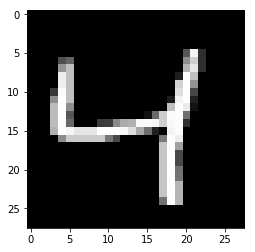

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [8]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value
image_size = mnist.train.images.shape[1]
print(image_size)
# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, (None, image_size), name='inputs')
targets_ = tf.placeholder(tf.float32, (None, image_size), name='targets')

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, image_size, activation=None)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits, name='output')

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits) 
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer


opt = tf.train.AdamOptimizer(0.001).minimize(cost)

784


## Training

In [9]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [10]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6933
Epoch: 1/20... Training loss: 0.6896
Epoch: 1/20... Training loss: 0.6858
Epoch: 1/20... Training loss: 0.6816
Epoch: 1/20... Training loss: 0.6763
Epoch: 1/20... Training loss: 0.6701
Epoch: 1/20... Training loss: 0.6626
Epoch: 1/20... Training loss: 0.6536
Epoch: 1/20... Training loss: 0.6437
Epoch: 1/20... Training loss: 0.6332
Epoch: 1/20... Training loss: 0.6204
Epoch: 1/20... Training loss: 0.6082
Epoch: 1/20... Training loss: 0.5925
Epoch: 1/20... Training loss: 0.5740
Epoch: 1/20... Training loss: 0.5615
Epoch: 1/20... Training loss: 0.5382
Epoch: 1/20... Training loss: 0.5227
Epoch: 1/20... Training loss: 0.5056
Epoch: 1/20... Training loss: 0.4902
Epoch: 1/20... Training loss: 0.4701
Epoch: 1/20... Training loss: 0.4526
Epoch: 1/20... Training loss: 0.4356
Epoch: 1/20... Training loss: 0.4208
Epoch: 1/20... Training loss: 0.4058
Epoch: 1/20... Training loss: 0.3948
Epoch: 1/20... Training loss: 0.3812
Epoch: 1/20... Training loss: 0.3746
E

Epoch: 1/20... Training loss: 0.1942
Epoch: 1/20... Training loss: 0.1913
Epoch: 1/20... Training loss: 0.1953
Epoch: 1/20... Training loss: 0.1995
Epoch: 1/20... Training loss: 0.1918
Epoch: 1/20... Training loss: 0.1948
Epoch: 1/20... Training loss: 0.1978
Epoch: 1/20... Training loss: 0.1856
Epoch: 1/20... Training loss: 0.1954
Epoch: 1/20... Training loss: 0.1879
Epoch: 1/20... Training loss: 0.1919
Epoch: 1/20... Training loss: 0.1913
Epoch: 1/20... Training loss: 0.1904
Epoch: 1/20... Training loss: 0.1888
Epoch: 1/20... Training loss: 0.1928
Epoch: 1/20... Training loss: 0.1873
Epoch: 1/20... Training loss: 0.1900
Epoch: 1/20... Training loss: 0.1884
Epoch: 1/20... Training loss: 0.1885
Epoch: 1/20... Training loss: 0.1852
Epoch: 1/20... Training loss: 0.1913
Epoch: 1/20... Training loss: 0.1876
Epoch: 1/20... Training loss: 0.1848
Epoch: 1/20... Training loss: 0.1811
Epoch: 1/20... Training loss: 0.1842
Epoch: 1/20... Training loss: 0.1860
Epoch: 1/20... Training loss: 0.1819
E

Epoch: 2/20... Training loss: 0.1642
Epoch: 2/20... Training loss: 0.1587
Epoch: 2/20... Training loss: 0.1554
Epoch: 2/20... Training loss: 0.1641
Epoch: 2/20... Training loss: 0.1549
Epoch: 2/20... Training loss: 0.1618
Epoch: 2/20... Training loss: 0.1596
Epoch: 2/20... Training loss: 0.1589
Epoch: 2/20... Training loss: 0.1545
Epoch: 2/20... Training loss: 0.1536
Epoch: 2/20... Training loss: 0.1638
Epoch: 2/20... Training loss: 0.1586
Epoch: 2/20... Training loss: 0.1652
Epoch: 2/20... Training loss: 0.1589
Epoch: 2/20... Training loss: 0.1589
Epoch: 2/20... Training loss: 0.1553
Epoch: 2/20... Training loss: 0.1545
Epoch: 2/20... Training loss: 0.1584
Epoch: 2/20... Training loss: 0.1581
Epoch: 2/20... Training loss: 0.1574
Epoch: 2/20... Training loss: 0.1629
Epoch: 2/20... Training loss: 0.1535
Epoch: 2/20... Training loss: 0.1581
Epoch: 2/20... Training loss: 0.1546
Epoch: 2/20... Training loss: 0.1538
Epoch: 2/20... Training loss: 0.1578
Epoch: 2/20... Training loss: 0.1532
E

Epoch: 3/20... Training loss: 0.1349
Epoch: 3/20... Training loss: 0.1374
Epoch: 3/20... Training loss: 0.1433
Epoch: 3/20... Training loss: 0.1377
Epoch: 3/20... Training loss: 0.1356
Epoch: 3/20... Training loss: 0.1333
Epoch: 3/20... Training loss: 0.1349
Epoch: 3/20... Training loss: 0.1346
Epoch: 3/20... Training loss: 0.1388
Epoch: 3/20... Training loss: 0.1413
Epoch: 3/20... Training loss: 0.1338
Epoch: 3/20... Training loss: 0.1366
Epoch: 3/20... Training loss: 0.1410
Epoch: 3/20... Training loss: 0.1364
Epoch: 3/20... Training loss: 0.1402
Epoch: 3/20... Training loss: 0.1346
Epoch: 3/20... Training loss: 0.1395
Epoch: 3/20... Training loss: 0.1382
Epoch: 3/20... Training loss: 0.1431
Epoch: 3/20... Training loss: 0.1381
Epoch: 3/20... Training loss: 0.1364
Epoch: 3/20... Training loss: 0.1373
Epoch: 3/20... Training loss: 0.1395
Epoch: 3/20... Training loss: 0.1318
Epoch: 3/20... Training loss: 0.1349
Epoch: 3/20... Training loss: 0.1363
Epoch: 3/20... Training loss: 0.1370
E

Epoch: 4/20... Training loss: 0.1288
Epoch: 4/20... Training loss: 0.1297
Epoch: 4/20... Training loss: 0.1290
Epoch: 4/20... Training loss: 0.1266
Epoch: 4/20... Training loss: 0.1286
Epoch: 4/20... Training loss: 0.1234
Epoch: 4/20... Training loss: 0.1259
Epoch: 4/20... Training loss: 0.1269
Epoch: 4/20... Training loss: 0.1255
Epoch: 4/20... Training loss: 0.1258
Epoch: 4/20... Training loss: 0.1245
Epoch: 4/20... Training loss: 0.1270
Epoch: 4/20... Training loss: 0.1192
Epoch: 4/20... Training loss: 0.1223
Epoch: 4/20... Training loss: 0.1262
Epoch: 4/20... Training loss: 0.1264
Epoch: 4/20... Training loss: 0.1271
Epoch: 4/20... Training loss: 0.1233
Epoch: 4/20... Training loss: 0.1279
Epoch: 4/20... Training loss: 0.1231
Epoch: 4/20... Training loss: 0.1291
Epoch: 4/20... Training loss: 0.1220
Epoch: 4/20... Training loss: 0.1200
Epoch: 4/20... Training loss: 0.1214
Epoch: 4/20... Training loss: 0.1215
Epoch: 4/20... Training loss: 0.1199
Epoch: 4/20... Training loss: 0.1246
E

Epoch: 4/20... Training loss: 0.1120
Epoch: 4/20... Training loss: 0.1188
Epoch: 4/20... Training loss: 0.1196
Epoch: 4/20... Training loss: 0.1110
Epoch: 4/20... Training loss: 0.1179
Epoch: 4/20... Training loss: 0.1219
Epoch: 4/20... Training loss: 0.1214
Epoch: 4/20... Training loss: 0.1124
Epoch: 4/20... Training loss: 0.1143
Epoch: 4/20... Training loss: 0.1168
Epoch: 4/20... Training loss: 0.1116
Epoch: 4/20... Training loss: 0.1119
Epoch: 4/20... Training loss: 0.1121
Epoch: 4/20... Training loss: 0.1153
Epoch: 4/20... Training loss: 0.1098
Epoch: 4/20... Training loss: 0.1165
Epoch: 4/20... Training loss: 0.1197
Epoch: 4/20... Training loss: 0.1104
Epoch: 4/20... Training loss: 0.1164
Epoch: 4/20... Training loss: 0.1166
Epoch: 4/20... Training loss: 0.1149
Epoch: 4/20... Training loss: 0.1107
Epoch: 4/20... Training loss: 0.1160
Epoch: 4/20... Training loss: 0.1192
Epoch: 4/20... Training loss: 0.1165
Epoch: 4/20... Training loss: 0.1154
Epoch: 4/20... Training loss: 0.1121
E

Epoch: 5/20... Training loss: 0.1091
Epoch: 5/20... Training loss: 0.1128
Epoch: 5/20... Training loss: 0.1111
Epoch: 5/20... Training loss: 0.1089
Epoch: 5/20... Training loss: 0.1082
Epoch: 5/20... Training loss: 0.1086
Epoch: 5/20... Training loss: 0.1062
Epoch: 5/20... Training loss: 0.1106
Epoch: 5/20... Training loss: 0.1097
Epoch: 5/20... Training loss: 0.1086
Epoch: 5/20... Training loss: 0.1101
Epoch: 5/20... Training loss: 0.1121
Epoch: 5/20... Training loss: 0.1116
Epoch: 5/20... Training loss: 0.1056
Epoch: 5/20... Training loss: 0.1126
Epoch: 5/20... Training loss: 0.1132
Epoch: 5/20... Training loss: 0.1114
Epoch: 5/20... Training loss: 0.1136
Epoch: 5/20... Training loss: 0.1122
Epoch: 5/20... Training loss: 0.1101
Epoch: 5/20... Training loss: 0.1102
Epoch: 5/20... Training loss: 0.1090
Epoch: 5/20... Training loss: 0.1143
Epoch: 5/20... Training loss: 0.1124
Epoch: 5/20... Training loss: 0.1109
Epoch: 5/20... Training loss: 0.1085
Epoch: 5/20... Training loss: 0.1130
E

Epoch: 6/20... Training loss: 0.1089
Epoch: 6/20... Training loss: 0.1058
Epoch: 6/20... Training loss: 0.1071
Epoch: 6/20... Training loss: 0.1063
Epoch: 6/20... Training loss: 0.1045
Epoch: 6/20... Training loss: 0.1007
Epoch: 6/20... Training loss: 0.1071
Epoch: 6/20... Training loss: 0.1092
Epoch: 6/20... Training loss: 0.1066
Epoch: 6/20... Training loss: 0.1064
Epoch: 6/20... Training loss: 0.1067
Epoch: 6/20... Training loss: 0.1068
Epoch: 6/20... Training loss: 0.1051
Epoch: 6/20... Training loss: 0.1015
Epoch: 6/20... Training loss: 0.1100
Epoch: 6/20... Training loss: 0.1041
Epoch: 6/20... Training loss: 0.1055
Epoch: 6/20... Training loss: 0.1029
Epoch: 6/20... Training loss: 0.1079
Epoch: 6/20... Training loss: 0.1077
Epoch: 6/20... Training loss: 0.1052
Epoch: 6/20... Training loss: 0.1078
Epoch: 6/20... Training loss: 0.1052
Epoch: 6/20... Training loss: 0.1025
Epoch: 6/20... Training loss: 0.1064
Epoch: 6/20... Training loss: 0.1044
Epoch: 6/20... Training loss: 0.1028
E

Epoch: 7/20... Training loss: 0.1066
Epoch: 7/20... Training loss: 0.1052
Epoch: 7/20... Training loss: 0.1045
Epoch: 7/20... Training loss: 0.1013
Epoch: 7/20... Training loss: 0.1037
Epoch: 7/20... Training loss: 0.1025
Epoch: 7/20... Training loss: 0.0991
Epoch: 7/20... Training loss: 0.0987
Epoch: 7/20... Training loss: 0.1038
Epoch: 7/20... Training loss: 0.0979
Epoch: 7/20... Training loss: 0.1024
Epoch: 7/20... Training loss: 0.1014
Epoch: 7/20... Training loss: 0.1039
Epoch: 7/20... Training loss: 0.1024
Epoch: 7/20... Training loss: 0.1052
Epoch: 7/20... Training loss: 0.1059
Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.0994
Epoch: 7/20... Training loss: 0.1028
Epoch: 7/20... Training loss: 0.0982
Epoch: 7/20... Training loss: 0.1024
Epoch: 7/20... Training loss: 0.1046
Epoch: 7/20... Training loss: 0.0995
Epoch: 7/20... Training loss: 0.1016
Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.1032
Epoch: 7/20... Training loss: 0.1011
E

Epoch: 7/20... Training loss: 0.0974
Epoch: 7/20... Training loss: 0.1042
Epoch: 7/20... Training loss: 0.0998
Epoch: 7/20... Training loss: 0.1003
Epoch: 7/20... Training loss: 0.0994
Epoch: 7/20... Training loss: 0.1000
Epoch: 7/20... Training loss: 0.1021
Epoch: 7/20... Training loss: 0.1031
Epoch: 7/20... Training loss: 0.0997
Epoch: 7/20... Training loss: 0.0972
Epoch: 7/20... Training loss: 0.0978
Epoch: 7/20... Training loss: 0.1015
Epoch: 7/20... Training loss: 0.0993
Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.1017
Epoch: 7/20... Training loss: 0.1016
Epoch: 7/20... Training loss: 0.1025
Epoch: 7/20... Training loss: 0.0973
Epoch: 7/20... Training loss: 0.1030
Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.1025
Epoch: 7/20... Training loss: 0.1031
Epoch: 7/20... Training loss: 0.0984
Epoch: 7/20... Training loss: 0.0984
Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.1016
Epoch: 7/20... Training loss: 0.0962
E

Epoch: 8/20... Training loss: 0.0971
Epoch: 8/20... Training loss: 0.0925
Epoch: 8/20... Training loss: 0.0969
Epoch: 8/20... Training loss: 0.0966
Epoch: 8/20... Training loss: 0.0991
Epoch: 8/20... Training loss: 0.0956
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.1022
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.0954
Epoch: 8/20... Training loss: 0.0966
Epoch: 8/20... Training loss: 0.0978
Epoch: 8/20... Training loss: 0.0976
Epoch: 8/20... Training loss: 0.0959
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.1019
Epoch: 8/20... Training loss: 0.0933
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.0959
Epoch: 8/20... Training loss: 0.0991
Epoch: 8/20... Training loss: 0.0962
Epoch: 8/20... Training loss: 0.0994
Epoch: 8/20... Training loss: 0.0965
Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.0966
Epoch: 8/20... Training loss: 0.0974
E

Epoch: 9/20... Training loss: 0.0941
Epoch: 9/20... Training loss: 0.0966
Epoch: 9/20... Training loss: 0.0966
Epoch: 9/20... Training loss: 0.0969
Epoch: 9/20... Training loss: 0.0950
Epoch: 9/20... Training loss: 0.0953
Epoch: 9/20... Training loss: 0.0953
Epoch: 9/20... Training loss: 0.0979
Epoch: 9/20... Training loss: 0.0945
Epoch: 9/20... Training loss: 0.0977
Epoch: 9/20... Training loss: 0.0923
Epoch: 9/20... Training loss: 0.0985
Epoch: 9/20... Training loss: 0.0949
Epoch: 9/20... Training loss: 0.0938
Epoch: 9/20... Training loss: 0.0936
Epoch: 9/20... Training loss: 0.0988
Epoch: 9/20... Training loss: 0.0975
Epoch: 9/20... Training loss: 0.1003
Epoch: 9/20... Training loss: 0.0948
Epoch: 9/20... Training loss: 0.0988
Epoch: 9/20... Training loss: 0.0993
Epoch: 9/20... Training loss: 0.0962
Epoch: 9/20... Training loss: 0.0991
Epoch: 9/20... Training loss: 0.0948
Epoch: 9/20... Training loss: 0.0978
Epoch: 9/20... Training loss: 0.0979
Epoch: 9/20... Training loss: 0.0972
E

Epoch: 10/20... Training loss: 0.0972
Epoch: 10/20... Training loss: 0.0971
Epoch: 10/20... Training loss: 0.0972
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0969
Epoch: 10/20... Training loss: 0.0938
Epoch: 10/20... Training loss: 0.0974
Epoch: 10/20... Training loss: 0.0960
Epoch: 10/20... Training loss: 0.0970
Epoch: 10/20... Training loss: 0.0980
Epoch: 10/20... Training loss: 0.0968
Epoch: 10/20... Training loss: 0.0947
Epoch: 10/20... Training loss: 0.0925
Epoch: 10/20... Training loss: 0.0958
Epoch: 10/20... Training loss: 0.0965
Epoch: 10/20... Training loss: 0.0933
Epoch: 10/20... Training loss: 0.0889
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.0936
Epoch: 10/20... Training loss: 0.0966
Epoch: 10/20... Training loss: 0.0955
Epoch: 10/20... Training loss: 0.0932
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0920
Epoch: 10/20... Training loss: 0.0965
Epoch: 10/20... Training loss: 0.0971
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0957
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0978
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0939
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0908
Epoch: 11/20... Training loss: 0.0945
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0970
Epoch: 11/20... Training loss: 0.0957
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0895
Epoch: 11/20... Training loss: 0.0935
Epoch: 11/20... Training loss: 0.0974
Epoch: 11/20... Training loss: 0.0958
Epoch: 11/20... Training loss: 0.0933
Epoch: 11/20... Training loss: 0.0959
Epoch: 11/20... Training loss: 0.0936
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0970
Epoch: 11/20

Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0937
Epoch: 11/20... Training loss: 0.0957
Epoch: 11/20... Training loss: 0.0932
Epoch: 11/20... Training loss: 0.0939
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0968
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0953
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0926
Epoch: 11/20... Training loss: 0.0967
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0982
Epoch: 11/20... Training loss: 0.0933
Epoch: 11/20... Training loss: 0.0923
Epoch: 11/20... Training loss: 0.0937
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0953
Epoch: 11/20... Training loss: 0.0923
Epoch: 11/20... Training loss: 0.0965
Epoch: 11/20... Training loss: 0.0973
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0920
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0957
Epoch: 12/20... Training loss: 0.0906
Epoch: 12/20... Training loss: 0.0926
Epoch: 12/20... Training loss: 0.0981
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.0974
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0940
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0965
Epoch: 12/20... Training loss: 0.0982
Epoch: 12/20... Training loss: 0.0984
Epoch: 12/20... Training loss: 0.0927
Epoch: 12/20... Training loss: 0.0937
Epoch: 12/20... Training loss: 0.0976
Epoch: 12/20... Training loss: 0.0923
Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20... Training loss: 0.0995
Epoch: 12/20... Training loss: 0.0961
Epoch: 12/20... Training loss: 0.0983
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0955
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0967
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0938
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0924
Epoch: 13/20... Training loss: 0.0950
Epoch: 13/20... Training loss: 0.0963
Epoch: 13/20... Training loss: 0.0951
Epoch: 13/20... Training loss: 0.0962
Epoch: 13/20... Training loss: 0.0936
Epoch: 13/20... Training loss: 0.0936
Epoch: 13/20... Training loss: 0.0929
Epoch: 13/20... Training loss: 0.0910
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0967
Epoch: 13/20... Training loss: 0.0943
Epoch: 13/20... Training loss: 0.0960
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0958
Epoch: 13/20... Training loss: 0.0962
Epoch: 13/20... Training loss: 0.0960
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0934
Epoch: 13/20... Training loss: 0.0962
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20... Training loss: 0.0935
Epoch: 14/20... Training loss: 0.0899
Epoch: 14/20... Training loss: 0.0946
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0954
Epoch: 14/20... Training loss: 0.0946
Epoch: 14/20... Training loss: 0.0908
Epoch: 14/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0961
Epoch: 14/20... Training loss: 0.0916
Epoch: 14/20... Training loss: 0.0919
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0950
Epoch: 14/20... Training loss: 0.0906
Epoch: 14/20... Training loss: 0.0958
Epoch: 14/20... Training loss: 0.0973
Epoch: 14/20... Training loss: 0.0989
Epoch: 14/20... Training loss: 0.0989
Epoch: 14/20... Training loss: 0.0941
Epoch: 14/20... Training loss: 0.0900
Epoch: 14/20

Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20... Training loss: 0.0979
Epoch: 14/20... Training loss: 0.0941
Epoch: 14/20... Training loss: 0.0970
Epoch: 14/20... Training loss: 0.0924
Epoch: 14/20... Training loss: 0.0909
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.0922
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0911
Epoch: 14/20... Training loss: 0.0915
Epoch: 14/20... Training loss: 0.0965
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0956
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0961
Epoch: 14/20... Training loss: 0.0966
Epoch: 14/20... Training loss: 0.0916
Epoch: 14/20... Training loss: 0.0967
Epoch: 14/20... Training loss: 0.1004
Epoch: 14/20... Training loss: 0.0975
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0969
Epoch: 15/20... Training loss: 0.0955
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0958
Epoch: 15/20... Training loss: 0.0909
Epoch: 15/20... Training loss: 0.0929
Epoch: 15/20... Training loss: 0.0950
Epoch: 15/20... Training loss: 0.0980
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.0956
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0924
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.0892
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20... Training loss: 0.0925
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0981
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0962
Epoch: 15/20... Training loss: 0.0921
Epoch: 15/20... Training loss: 0.0973
Epoch: 15/20... Training loss: 0.0963
Epoch: 15/20... Training loss: 0.0925
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0923
Epoch: 16/20... Training loss: 0.0898
Epoch: 16/20... Training loss: 0.0965
Epoch: 16/20... Training loss: 0.0903
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0954
Epoch: 16/20... Training loss: 0.0923
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0908
Epoch: 16/20... Training loss: 0.0915
Epoch: 16/20... Training loss: 0.0942
Epoch: 16/20... Training loss: 0.0946
Epoch: 16/20... Training loss: 0.0945
Epoch: 16/20... Training loss: 0.0949
Epoch: 16/20... Training loss: 0.0962
Epoch: 16/20... Training loss: 0.0907
Epoch: 16/20... Training loss: 0.0966
Epoch: 16/20... Training loss: 0.0971
Epoch: 16/20... Training loss: 0.0922
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0938
Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.0895
Epoch: 16/20... Training loss: 0.0940
Epoch: 16/20... Training loss: 0.0953
Epoch: 16/20... Training loss: 0.0935
Epoch: 16/20

Epoch: 16/20... Training loss: 0.0934
Epoch: 16/20... Training loss: 0.0960
Epoch: 16/20... Training loss: 0.0949
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0993
Epoch: 16/20... Training loss: 0.0961
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0953
Epoch: 16/20... Training loss: 0.0919
Epoch: 16/20... Training loss: 0.0947
Epoch: 16/20... Training loss: 0.0950
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0888
Epoch: 16/20... Training loss: 0.0926
Epoch: 16/20... Training loss: 0.0947
Epoch: 16/20... Training loss: 0.0977
Epoch: 16/20... Training loss: 0.0902
Epoch: 16/20... Training loss: 0.0950
Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20... Training loss: 0.0904
Epoch: 17/20... Training loss: 0.0911
Epoch: 17/20... Training loss: 0.0901
Epoch: 17/20... Training loss: 0.0908
Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20... Training loss: 0.0908
Epoch: 17/20... Training loss: 0.0951
Epoch: 17/20

Epoch: 17/20... Training loss: 0.0885
Epoch: 17/20... Training loss: 0.0923
Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0946
Epoch: 17/20... Training loss: 0.0951
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0914
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20... Training loss: 0.0949
Epoch: 17/20... Training loss: 0.0949
Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20... Training loss: 0.0963
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0961
Epoch: 17/20... Training loss: 0.0953
Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20... Training loss: 0.0909
Epoch: 17/20... Training loss: 0.0956
Epoch: 17/20... Training loss: 0.0955
Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0961
Epoch: 17/20... Training loss: 0.0971
Epoch: 17/20... Training loss: 0.0957
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0919
Epoch: 18/20... Training loss: 0.0920
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0959
Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0923
Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20... Training loss: 0.0974
Epoch: 18/20... Training loss: 0.0970
Epoch: 18/20... Training loss: 0.0910
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0925
Epoch: 18/20... Training loss: 0.0916
Epoch: 18/20... Training loss: 0.0909
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0944
Epoch: 18/20... Training loss: 0.0946
Epoch: 18/20... Training loss: 0.0961
Epoch: 18/20... Training loss: 0.0947
Epoch: 18/20... Training loss: 0.0983
Epoch: 18/20... Training loss: 0.0931
Epoch: 18/20... Training loss: 0.0919
Epoch: 18/20... Training loss: 0.0915
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0940
Epoch: 19/20... Training loss: 0.0891
Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20... Training loss: 0.0920
Epoch: 19/20... Training loss: 0.0949
Epoch: 19/20... Training loss: 0.0946
Epoch: 19/20... Training loss: 0.0941
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0964
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0916
Epoch: 19/20... Training loss: 0.0940
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0920
Epoch: 19/20... Training loss: 0.0916
Epoch: 19/20... Training loss: 0.0947
Epoch: 19/20... Training loss: 0.0909
Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0954
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0917
Epoch: 19/20... Training loss: 0.0970
Epoch: 19/20... Training loss: 0.0965
Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20

Epoch: 19/20... Training loss: 0.0919
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0942
Epoch: 19/20... Training loss: 0.0950
Epoch: 19/20... Training loss: 0.0895
Epoch: 19/20... Training loss: 0.0890
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0952
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0939
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0935
Epoch: 20/20... Training loss: 0.0901
Epoch: 20/20... Training loss: 0.0958
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0901
Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20... Training loss: 0.0923
Epoch: 20/20... Training loss: 0.0956
Epoch: 20/20... Training loss: 0.0920
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0946
Epoch: 20/20... Training loss: 0.0925
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20

Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0955
Epoch: 20/20... Training loss: 0.0959
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0952
Epoch: 20/20... Training loss: 0.0959
Epoch: 20/20... Training loss: 0.0925
Epoch: 20/20... Training loss: 0.0977
Epoch: 20/20... Training loss: 0.0912
Epoch: 20/20... Training loss: 0.0889
Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0910
Epoch: 20/20... Training loss: 0.0919
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0925
Epoch: 20/20... Training loss: 0.0912
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0958
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0939
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

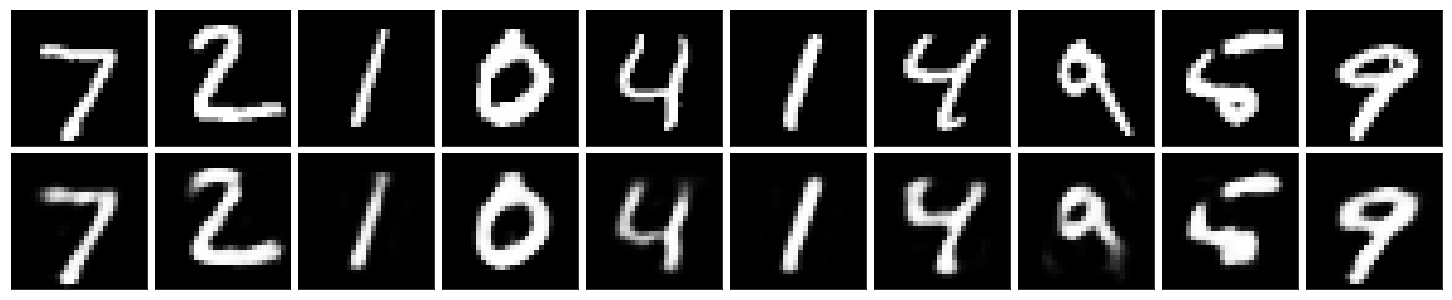

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [12]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.